In [1]:
from google.colab import drive
import os
import zipfile

In [50]:
pip install pytesseract

In [2]:
# Define the path to the zip file and the destination directory
zip_file_path = '/content/drive/MyDrive/SoulPageIT_Assignment/Licplatesdetection_train.zip'  # Update this path to your zip file location
extract_dir = '/content/dataset/Licplatesdetection_train/'

# Create the destination directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print('Dataset unzipped successfully')

Dataset unzipped successfully


In [3]:
# Define the path to the zip file and the destination directory
zip_file_path = '/content/drive/MyDrive/SoulPageIT_Assignment/Licplatesrecognition_train.zip'  # Update this path to your zip file location
extract_dir = '/content/dataset/Licplatesrecognition_train/'

# Create the destination directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print('Dataset unzipped successfully')

Dataset unzipped successfully


In [4]:
# Define the path to the zip file and the destination directory
zip_file_path = '/content/drive/MyDrive/SoulPageIT_Assignment/test.zip'  # Update this path to your zip file location
extract_dir = '/content/dataset/test/'

# Create the destination directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print('Dataset unzipped successfully')

Dataset unzipped successfully


In [9]:
import csv
import json

def convert_csv_to_json(csv_file_path, json_file_path):
    data = []
    with open(csv_file_path, mode='r', newline='', encoding='utf-8') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            data.append(row)

    with open(json_file_path, mode='w', encoding='utf-8') as json_file:
        json.dump(data, json_file, indent=4)

    print(f'CSV file {csv_file_path} has been converted to JSON file {json_file_path}.')

# File paths
csv_files = [
    '/content/Licplatesdetection_train.csv',
    '/content/Licplatesrecognition_train.csv'
]

# Convert each CSV file to a corresponding JSON file
for csv_file in csv_files:
    json_file = csv_file.replace('.csv', '.json')
    convert_csv_to_json(csv_file, json_file)


CSV file /content/Licplatesdetection_train.csv has been converted to JSON file /content/Licplatesdetection_train.json.
CSV file /content/Licplatesrecognition_train.csv has been converted to JSON file /content/Licplatesrecognition_train.json.


In [7]:
import requests
import random
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import urllib
import cv2

import json


In [13]:
import json

json_file_path = '/content/Licplatesdetection_train.json'

# Load and print the first few entries of the JSON file
with open(json_file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)
    for entry in data[:5]:  # Print the first 5 entries to understand the structure
        print(json.dumps(entry, indent=4))


{
    "img_id": "1.jpg",
    "ymin": "276",
    "xmin": "94",
    "ymax": "326",
    "xmax": "169"
}
{
    "img_id": "10.jpg",
    "ymin": "311",
    "xmin": "395",
    "ymax": "344",
    "xmax": "444"
}
{
    "img_id": "100.jpg",
    "ymin": "406",
    "xmin": "263",
    "ymax": "450",
    "xmax": "434"
}
{
    "img_id": "101.jpg",
    "ymin": "283",
    "xmin": "363",
    "ymax": "315",
    "xmax": "494"
}
{
    "img_id": "102.jpg",
    "ymin": "139",
    "xmin": "42",
    "ymax": "280",
    "xmax": "222"
}


In [17]:
import os
import pandas as pd
import json

# Define paths
json_file_path = '/content/Licplatesdetection_train.json'
images_directory = '/content/dataset/Licplatesdetection_train/license_plates_detection_train'

# Preprocess the JSON data
def preprocess_json_file(file_path):
    json_data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        current_obj = {}
        for line in file:
            line = line.strip().rstrip(',')
            if line.startswith('{') or line.endswith('}'):
                continue
            key_value = line.split(':', 1)
            if len(key_value) == 2:
                key, value = key_value
                key = key.strip().strip('"')
                value = value.strip().strip('"')
                current_obj[key] = value
                if key == 'xmax':  # Assuming 'xmax' is the last key in each object
                    json_data.append(current_obj)
                    current_obj = {}
    return json_data

# Load and preprocess JSON data
json_data = preprocess_json_file(json_file_path)

# Convert JSON data to DataFrame
data = pd.DataFrame(json_data)

# Display the first few rows to understand the structure
print(data.head())

# Rename columns for clarity (optional)
data.rename(columns={
    'img_id': 'image',
    'xmin': 'x_min',
    'ymin': 'y_min',
    'xmax': 'x_max',
    'ymax': 'y_max'
}, inplace=True)

# Add a column for the image file paths
data['image_path'] = data.apply(lambda row: os.path.join(images_directory, row['image']), axis=1)

# Check the data DataFrame
print(data.head())

# Save the cleaned DataFrame to a CSV file (optional)
output_csv_path = '/content/Licplatesdetection_train_cleaned.csv'
data.to_csv(output_csv_path, index=False)


    img_id ymin xmin ymax xmax
0    1.jpg  276   94  326  169
1   10.jpg  311  395  344  444
2  100.jpg  406  263  450  434
3  101.jpg  283  363  315  494
4  102.jpg  139   42  280  222
     image y_min x_min y_max x_max  \
0    1.jpg   276    94   326   169   
1   10.jpg   311   395   344   444   
2  100.jpg   406   263   450   434   
3  101.jpg   283   363   315   494   
4  102.jpg   139    42   280   222   

                                                                         image_path  
0    /content/dataset/Licplatesdetection_train/license_plates_detection_train/1.jpg  
1   /content/dataset/Licplatesdetection_train/license_plates_detection_train/10.jpg  
2  /content/dataset/Licplatesdetection_train/license_plates_detection_train/100.jpg  
3  /content/dataset/Licplatesdetection_train/license_plates_detection_train/101.jpg  
4  /content/dataset/Licplatesdetection_train/license_plates_detection_train/102.jpg  


In [19]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import urllib.request

# Load the cleaned CSV file
csv_file_path = '/content/Licplatesdetection_train_cleaned.csv'
data = pd.read_csv(csv_file_path)

# Define images directory
images_directory = '/content/dataset/Licplatesdetection_train/license_plates_detection_train'

# Global lists to store processed data
Images = []
Plates = []
Points = []

def downloadTraining(df):
    global Images, Plates, Points
    for index, row in df.iterrows():
        # Get the image path
        image_path = os.path.join(images_directory, row['image'])

        # Load the image from the path
        im = np.array(Image.open(image_path))

        # Append the image to the training input array
        Images.append(im)

        # Points of rectangle
        x_point_top = int(row['x_min'])  # Adjust column name here
        y_point_top = int(row['y_min'])  # Adjust column name here
        x_point_bot = int(row['x_max'])  # Adjust column name here
        y_point_bot = int(row['y_max'])  # Adjust column name here
        Points.append([x_point_top, y_point_top, x_point_bot, y_point_bot])

        # Cut the plate from the image and use it as output
        plateImage = im[y_point_top:y_point_bot, x_point_top:x_point_bot]
        Plates.append(plateImage)

# Call the function to populate Images, Plates, and Points
downloadTraining(data)

# Optionally, you can print or manipulate Images, Plates, and Points as needed
print(f"Number of images: {len(Images)}")
print(f"Number of plates: {len(Plates)}")
print(f"Number of points: {len(Points)}")


Number of images: 900
Number of plates: 900
Number of points: 900


In [20]:
# This gives the format of the annotations
Points[:10]

[[94, 276, 169, 326],
 [395, 311, 444, 344],
 [263, 406, 434, 450],
 [363, 283, 494, 315],
 [42, 139, 222, 280],
 [320, 437, 450, 475],
 [511, 482, 623, 547],
 [452, 281, 535, 330],
 [172, 309, 281, 332],
 [328, 399, 441, 425]]

In [21]:
import pandas as pd

# Assuming 'Points' list is populated from the previous code

# Create DataFrame from Points list
main_df = pd.DataFrame(Points, columns=['xmin', 'ymin', 'xmax', 'ymax'])

# Display the first few rows to verify
print(main_df.head())


   xmin  ymin  xmax  ymax
0    94   276   169   326
1   395   311   444   344
2   263   406   434   450
3   363   283   494   315
4    42   139   222   280


In [25]:
# Define the path to the directory containing images
images_directory = '/content/dataset/Licplatesdetection_train/license_plates_detection_train/'

# Generate a list of image paths
give_me_236 = [images_directory + str(i) + '.jpg' for i in range(0, 900)]

# Display the first 10 image paths
print(give_me_236[:10])


['/content/dataset/Licplatesdetection_train/license_plates_detection_train/0.jpg', '/content/dataset/Licplatesdetection_train/license_plates_detection_train/1.jpg', '/content/dataset/Licplatesdetection_train/license_plates_detection_train/2.jpg', '/content/dataset/Licplatesdetection_train/license_plates_detection_train/3.jpg', '/content/dataset/Licplatesdetection_train/license_plates_detection_train/4.jpg', '/content/dataset/Licplatesdetection_train/license_plates_detection_train/5.jpg', '/content/dataset/Licplatesdetection_train/license_plates_detection_train/6.jpg', '/content/dataset/Licplatesdetection_train/license_plates_detection_train/7.jpg', '/content/dataset/Licplatesdetection_train/license_plates_detection_train/8.jpg', '/content/dataset/Licplatesdetection_train/license_plates_detection_train/9.jpg']


In [26]:
main_df['filename'] = give_me_236
main_df.head(10)

,xmin,ymin,xmax,ymax,filename
0,94,276,169,326,/content/dataset/Licplatesdetection_train/license_plates_detection_train/0.jpg
1,395,311,444,344,/content/dataset/Licplatesdetection_train/license_plates_detection_train/1.jpg
2,263,406,434,450,/content/dataset/Licplatesdetection_train/license_plates_detection_train/2.jpg
3,363,283,494,315,/content/dataset/Licplatesdetection_train/license_plates_detection_train/3.jpg
4,42,139,222,280,/content/dataset/Licplatesdetection_train/license_plates_detection_train/4.jpg
5,320,437,450,475,/content/dataset/Licplatesdetection_train/license_plates_detection_train/5.jpg
6,511,482,623,547,/content/dataset/Licplatesdetection_train/license_plates_detection_train/6.jpg
7,452,281,535,330,/content/dataset/Licplatesdetection_train/license_plates_detection_train/7.jpg
8,172,309,281,332,/content/dataset/Licplatesdetection_train/license_plates_detection_train/8.jpg
9,328,399,441,425,/content/dataset/Licplatesdetection_train/license_plates_detection_train/9.jpg


In [27]:
main_df['width'] = main_df['xmax'] - main_df['xmin']
main_df['height'] = main_df['ymax'] - main_df['ymin']

main_df.head()


,xmin,ymin,xmax,ymax,filename,width,height
0,94,276,169,326,/content/dataset/Licplatesdetection_train/license_plates_detection_train/0.jpg,75,50
1,395,311,444,344,/content/dataset/Licplatesdetection_train/license_plates_detection_train/1.jpg,49,33
2,263,406,434,450,/content/dataset/Licplatesdetection_train/license_plates_detection_train/2.jpg,171,44
3,363,283,494,315,/content/dataset/Licplatesdetection_train/license_plates_detection_train/3.jpg,131,32
4,42,139,222,280,/content/dataset/Licplatesdetection_train/license_plates_detection_train/4.jpg,180,141


In [28]:
modified_df = pd.DataFrame()
modified_df['filename'] = main_df['filename']
modified_df['width'] = main_df['width']
modified_df['height'] = main_df['height']
modified_df['class'] = 'license_plate'
modified_df['xmin'] = main_df['xmin']
modified_df['ymin'] = main_df['ymin']
modified_df['xmax'] = main_df['xmax']
modified_df['ymax'] = main_df['ymax']

modified_df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,/content/dataset/Licplatesdetection_train/license_plates_detection_train/0.jpg,75,50,license_plate,94,276,169,326
1,/content/dataset/Licplatesdetection_train/license_plates_detection_train/1.jpg,49,33,license_plate,395,311,444,344
2,/content/dataset/Licplatesdetection_train/license_plates_detection_train/2.jpg,171,44,license_plate,263,406,434,450
3,/content/dataset/Licplatesdetection_train/license_plates_detection_train/3.jpg,131,32,license_plate,363,283,494,315
4,/content/dataset/Licplatesdetection_train/license_plates_detection_train/4.jpg,180,141,license_plate,42,139,222,280


In [29]:
# 95% for train
train_labels = modified_df.sample(frac=0.95)
modified_df.drop(train_labels.index, axis=0, inplace=True)

# 5% for test
test_labels = modified_df

In [30]:
train_labels.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
364,/content/dataset/Licplatesdetection_train/license_plates_detection_train/364.jpg,64,56,license_plate,144,219,208,275
598,/content/dataset/Licplatesdetection_train/license_plates_detection_train/598.jpg,156,42,license_plate,219,239,375,281
316,/content/dataset/Licplatesdetection_train/license_plates_detection_train/316.jpg,116,48,license_plate,192,345,308,393
110,/content/dataset/Licplatesdetection_train/license_plates_detection_train/110.jpg,134,29,license_plate,145,191,279,220
550,/content/dataset/Licplatesdetection_train/license_plates_detection_train/550.jpg,105,19,license_plate,97,291,202,310


In [31]:
test_labels.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,/content/dataset/Licplatesdetection_train/license_plates_detection_train/0.jpg,75,50,license_plate,94,276,169,326
7,/content/dataset/Licplatesdetection_train/license_plates_detection_train/7.jpg,83,49,license_plate,452,281,535,330
45,/content/dataset/Licplatesdetection_train/license_plates_detection_train/45.jpg,212,41,license_plate,289,376,501,417
53,/content/dataset/Licplatesdetection_train/license_plates_detection_train/53.jpg,212,61,license_plate,248,352,460,413
59,/content/dataset/Licplatesdetection_train/license_plates_detection_train/59.jpg,132,60,license_plate,153,384,285,444


In [32]:
train_labels.shape

(855, 8)

In [33]:
test_labels.shape

(45, 8)

In [40]:
image_1 = cv2.imread('/content/dataset/Licplatesdetection_train/license_plates_detection_train/114.jpg')
image_1 = cv2.cvtColor(image_1,cv2.COLOR_BGR2RGB)

In [41]:
# 155	200	328	274
cv2.rectangle(image_1, (155, 200), (328, 274), (255,0,0), 2)
cv2.imwrite('rectangle.png', image_1)

True

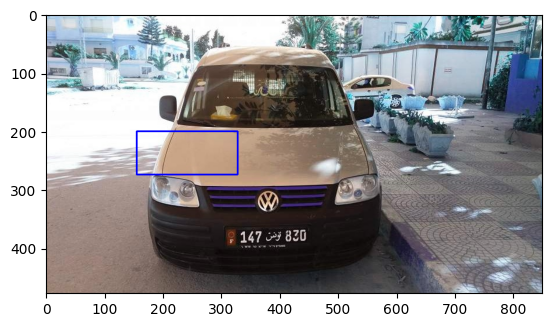

In [42]:
image = plt.imread('rectangle.png')
plt.imshow(image)
plt.show()

In [44]:
train_labels.to_csv('train_labels.csv', index=True)
test_labels.to_csv('test_labels.csv', index=False)

In [48]:
import pandas as pd
import numpy as np
from PIL import Image
import os

# Load and preprocess JSON data for text recognition
json_file_path_recognition = '/content/Licplatesrecognition_train.json'

def preprocess_json_file_recognition(file_path):
    json_data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            line = line.strip().rstrip(',')
            if line.startswith('{') or line.endswith('}'):
                continue
            key_value = line.split(':', 1)
            if len(key_value) == 2:
                key, value = key_value
                key = key.strip().strip('"')
                value = value.strip().strip('"')
                json_data.append({key: value})
    return json_data

# Load JSON data
json_data_recognition = preprocess_json_file_recognition(json_file_path_recognition)

# Convert JSON data to DataFrame
data_recognition = pd.DataFrame(json_data_recognition)

# Display the first few rows to understand the structure
print(data_recognition.head())

   img_id      text
0   0.jpg       NaN
1     NaN  117T3989
2   1.jpg       NaN
3     NaN  128T8086
4  10.jpg       NaN


In [49]:
import pandas as pd
import json

# Path to your JSON file
json_file_path = '/content/Licplatesrecognition_train.json'

# Load JSON data into Python
with open(json_file_path, 'r', encoding='utf-8') as file:
    json_data = json.load(file)

# Convert JSON data to DataFrame
df = pd.DataFrame(json_data)

# Optionally handle missing values (NaNs)
# For example, drop rows where both 'img_id' and 'text' are NaN
df.dropna(subset=['img_id', 'text'], how='all', inplace=True)

# Reset index if needed
df.reset_index(drop=True, inplace=True)

# Display the DataFrame
print(df)


      img_id      text
0      0.jpg  117T3989
1      1.jpg  128T8086
2     10.jpg   94T3458
3    100.jpg  133T6719
4    101.jpg   68T5979
..       ...       ...
895   95.jpg   39T8707
896   96.jpg    92T589
897   97.jpg   180T706
898   98.jpg   87T7369
899   99.jpg  159T8894

[900 rows x 2 columns]


In [58]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'


In [59]:
!tesseract --version


tesseract 4.1.1
 leptonica-1.82.0
  libgif 5.1.9 : libjpeg 8d (libjpeg-turbo 2.1.1) : libpng 1.6.37 : libtiff 4.3.0 : zlib 1.2.11 : libwebp 1.2.2 : libopenjp2 2.4.0
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found libarchive 3.6.0 zlib/1.2.11 liblzma/5.2.5 bz2lib/1.0.8 liblz4/1.9.3 libzstd/1.4.8


In [64]:
import os
import pandas as pd
import json
import cv2
import pytesseract

# Set Tesseract path (adjust as per your installation)
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Path to JSON file and image directory (adjust paths as needed)
json_file_path = '/content/Licplatesrecognition_train.json'
images_directory = '/content/dataset/Licplatesrecognition_train/license_plates_recognition_train/'

# Load JSON data into Python
with open(json_file_path, 'r', encoding='utf-8') as file:
    json_data = json.load(file)

# Convert JSON data to DataFrame
df = pd.DataFrame(json_data)

# Drop rows with missing 'img_id' or 'text' values (if any)
df.dropna(subset=['img_id', 'text'], inplace=True)

# Reset index for clarity
df.reset_index(drop=True, inplace=True)

# Function to perform text recognition on each image
def perform_text_recognition(df, images_directory):
    for index, row in df.iterrows():
        img_path = os.path.join(images_directory, row['img_id'])
        image = cv2.imread(img_path)
        # Perform text recognition using pytesseract
        text = pytesseract.image_to_string(image)

# Perform text recognition on images (function call)
perform_text_recognition(df, images_directory)

# Display the DataFrame without the recognized_text column
print(df.tail())

# Optionally, save the DataFrame without the recognized_text column to a CSV file
output_csv_path = '/content/licplates_recognition_results_without_text.csv'
df.to_csv(output_csv_path, index=False)

# Optionally, you can further process or analyze the DataFrame as needed.


     img_id      text
895  95.jpg   39T8707
896  96.jpg    92T589
897  97.jpg   180T706
898  98.jpg   87T7369
899  99.jpg  159T8894
